In [140]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [141]:
df = pd.read_csv('../Data-processed/final_data.csv')

In [142]:
df.head()

,N,P,K,pH,temperature,rainfall,crop
0,66.0,46.0,42.0,6.502985,20.879744,202.935536,rice
1,89.0,60.0,45.0,7.038096,21.770462,226.655537,rice
2,87.0,44.0,44.0,7.840207,23.004459,263.964248,rice
3,63.0,38.0,38.0,6.980401,26.491096,242.864034,rice
4,78.0,48.0,35.0,7.628473,20.130175,262.717340,rice


In [143]:
df.tail()


,N,P,K,pH,temperature,rainfall,crop
14739,191.0,91.225,235.000,7.0,22.500,80.0,maize
14740,95.0,53.550,207.500,6.5,31.500,20.0,oilcrop
14741,80.0,40.000,39.000,7.0,27.875,40.0,jowar
14742,191.0,89.000,229.125,7.0,22.500,80.0,maize
14743,80.0,41.000,40.000,7.0,29.125,41.0,jowar


In [144]:
print('size:', df.size)
print('shape:', df.shape)
print('columns:', df.columns)

size: 103208
shape: (14744, 7)
columns: Index(['N', 'P', 'K', 'pH', 'temperature', 'rainfall', 'crop'], dtype='object')


In [145]:
df['crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee', 'jowar',
       'pulses', 'oilcrop', 'wheat', 'sugercane'], dtype=object)

In [146]:
df.dtypes

N              float64
P              float64
K              float64
pH             float64
temperature    float64
rainfall       float64
crop            object
dtype: object

In [147]:
df['crop'].value_counts()

grapes         1892
maize          1892
sugercane      1792
wheat          1792
oilcrop        1792
pulses         1792
jowar          1792
apple           100
coffee          100
jute            100
cotton          100
coconut         100
papaya          100
orange          100
rice            100
muskmelon       100
mango           100
banana          100
pomegranate     100
lentil          100
blackgram       100
mungbean        100
mothbeans       100
pigeonpeas      100
kidneybeans     100
chickpea        100
watermelon      100
Name: crop, dtype: int64

<AxesSubplot:>

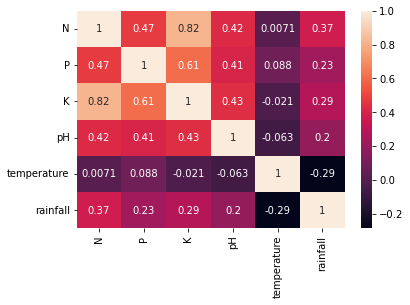

In [148]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [149]:
features = df[['N', 'P','K','temperature',  'pH', 'rainfall']]
target = df['crop']


In [150]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [151]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, train_size=0.80, test_size = 0.2,random_state =101)

# Decision Tree

In [152]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.03051881993896
              precision    recall  f1-score   support

       apple       0.28      1.00      0.43        19
      banana       0.00      0.00      0.00        22
   blackgram       0.00      0.00      0.00        22
    chickpea       0.00      0.00      0.00        23
     coconut       0.00      0.00      0.00        17
      coffee       0.00      0.00      0.00        17
      cotton       0.37      1.00      0.54        22
      grapes       1.00      0.93      0.96       375
       jowar       1.00      1.00      1.00       365
        jute       0.14      1.00      0.25        14
 kidneybeans       0.00      0.00      0.00        19
      lentil       0.77      0.87      0.82        23
       maize       1.00      0.93      0.97       378
       mango       0.00      0.00      0.00        19
   mothbeans       0.00      0.00      0.00        14
    mungbean       0.62      0.82      0.71        22
   muskmelon       1.00      1.00

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, n_splits=5)


def cross_val_score_setup(model, features, target):
    return cross_val_score(model, features, target, cv=kf, scoring='accuracy')



In [154]:
# Cross validation score (Decision Tree)

cross_val_score_setup(DecisionTree, features, target)

array([0.89013225, 0.89284503, 0.90776534, 0.90200068, 0.9009498 ])

### Saving trained Decision Tree model

In [155]:
import pickle
# Dump the trained Decision tree classifier with Pickle
DT_pkl_filename = '../models/DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [156]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9854187860291624
              precision    recall  f1-score   support

       apple       0.66      1.00      0.79        19
      banana       1.00      1.00      1.00        22
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        17
      cotton       0.54      1.00      0.70        22
      grapes       1.00      0.97      0.99       375
       jowar       1.00      1.00      1.00       365
        jute       0.81      0.93      0.87        14
 kidneybeans       0.86      0.95      0.90        19
      lentil       1.00      0.91      0.95        23
       maize       1.00      0.93      0.97       378
       mango       1.00      1.00      1.00        19
   mothbeans       0.93      0.93      0.93        14
    mungbean       0.92      1.00      0.96        22
   muskmelon       1.00      1.00 

In [157]:
# Cross validation score (NaiveBayes)
cross_val_score_setup(NaiveBayes,features,target)


array([0.99084435, 0.98609698, 0.99016616, 0.98474059, 0.98778833])

### Saving trained Guassian Naive Bayes model

In [158]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [159]:

from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(Xtrain, Ytrain)

#Predict the response for test dataset
Ypred = svm_clf.predict(Xtest)

accuracy = metrics.accuracy_score(Ytest, Ypred)

acc.append(accuracy)
model.append('SVM')

print("Accuracy:" ,accuracy)
print(classification_report(Ytest,predicted_values))


Accuracy: 0.9908443540183113
              precision    recall  f1-score   support

       apple       0.66      1.00      0.79        19
      banana       1.00      1.00      1.00        22
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        17
      cotton       0.54      1.00      0.70        22
      grapes       1.00      0.97      0.99       375
       jowar       1.00      1.00      1.00       365
        jute       0.81      0.93      0.87        14
 kidneybeans       0.86      0.95      0.90        19
      lentil       1.00      0.91      0.95        23
       maize       1.00      0.93      0.97       378
       mango       1.00      1.00      1.00        19
   mothbeans       0.93      0.93      0.93        14
    mungbean       0.92      1.00      0.96        22
   muskmelon       1.00      1.00      1.00        1

In [160]:
# Cross validation score (SVM)
cross_val_score_setup(svm_clf,features,target)


array([0.99016616, 0.99016616, 0.98880977, 0.99220075, 0.98609227])

In [161]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/SVM.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(svm_clf, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x * 100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  97.49067480501866
              precision    recall  f1-score   support

       apple       0.90      0.95      0.92        19
      banana       0.71      0.77      0.74        22
   blackgram       0.78      0.82      0.80        22
    chickpea       1.00      1.00      1.00        23
     coconut       0.94      1.00      0.97        17
      coffee       0.89      1.00      0.94        17
      cotton       0.88      1.00      0.94        22
      grapes       0.99      0.99      0.99       375
       jowar       1.00      1.00      1.00       365
        jute       0.62      0.71      0.67        14
 kidneybeans       0.80      0.84      0.82        19
      lentil       0.84      0.91      0.87        23
       maize       0.99      0.96      0.97       378
       mango       1.00      1.00      1.00        19
   mothbeans       0.29      0.57      0.38        14
    mungbean       0.62      0.23      0.33        22
   muskmelon       1.00    

In [163]:
# Cross validation score (Logistic Regression)
cross_val_score_setup(LogReg,features,target)


array([0.97388945, 0.97626314, 0.97558494, 0.97287216, 0.9765943 ])

### Saving trained Logistic Regression model

In [164]:
import pickle
# Dump the trained Random Forest classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x * 100)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  99.52526280094948
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        22
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        17
      coffee       1.00      1.00      1.00        17
      cotton       0.95      0.95      0.95        22
      grapes       1.00      1.00      1.00       375
       jowar       1.00      1.00      1.00       365
        jute       0.88      1.00      0.93        14
 kidneybeans       0.90      0.95      0.92        19
      lentil       0.88      0.91      0.89        23
       maize       1.00      1.00      1.00       378
       mango       1.00      1.00      1.00        19
   mothbeans       0.92      0.79      0.85        14
    mungbean       0.86      0.86      0.86        22
   muskmelon       1.00      1.00      1.00 

In [166]:
# Cross validation score (Random Forest)
cross_val_score_setup(RF,features,target)


array([0.99796541, 0.99525263, 0.99796541, 0.99762631, 0.99626866])

### Saving trained Random Forest model

In [167]:
import pickle
# Dump the trained Random Forest classifier with Pickle
RF_pkl_filename = '../models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

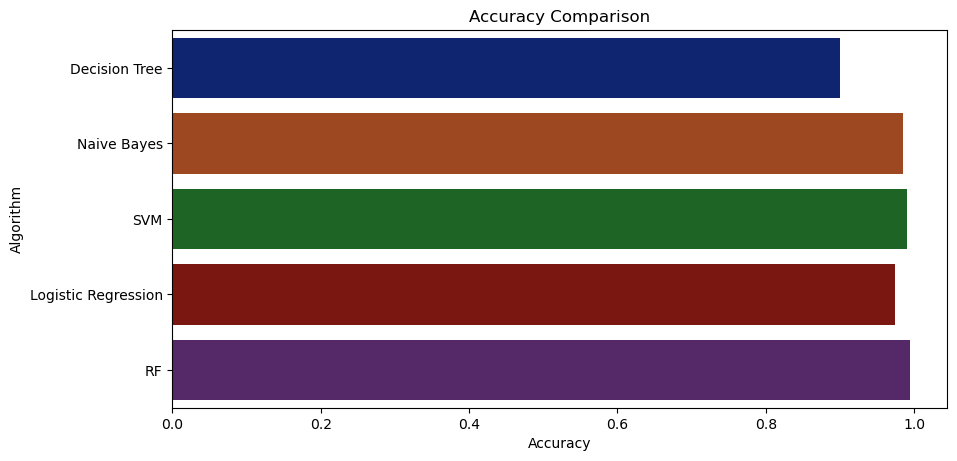

In [168]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [169]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9003051881993896
Naive Bayes --> 0.9854187860291624
SVM --> 0.9908443540183113
Logistic Regression --> 0.9749067480501865
RF --> 0.9952526280094948


## Making a prediction with RF

In [170]:
data = np.array([[104,18, 30, 23.603016,  6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

##############################
data = np.array([[83, 45, 60, 28,  7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

############################

data = np.array([[82,40 ,30 ,28.5 ,6.7875,120 ]])
prediction = RF.predict(data)
print(prediction)

['coffee']
['papaya']
['coffee']


### Making a prediction with Naive Bayes

In [171]:
data = np.array([[104,18, 30, 23.603016,  6.7, 140.91]])
prediction = NaiveBayes.predict(data)
print(prediction)

#########################
data = np.array([[83, 45, 60, 28,  7.0, 150.9]])
prediction = NaiveBayes.predict(data)
print(prediction)

#####################333
data = np.array([[82,40 ,30 ,28.5 ,6.7875,120 ]])
prediction = NaiveBayes.predict(data)
print(prediction)

['coffee']
['papaya']
['coffee']


### Making a prediction with SVM

In [172]:
data = np.array([[104,18, 30, 23.603016,  6.7, 140.91]])
prediction = svm_clf.predict(data)
print(prediction)

#########################
data = np.array([[83, 45, 60, 28,  7.0, 150.9]])
prediction = svm_clf.predict(data)
print(prediction)

#####################
data = np.array([[82,40 ,30 ,28.5 ,6.7875,120 ]])
prediction = svm_clf.predict(data)
print(prediction)

['coffee']
['jute']
['coffee']
